<a href="https://colab.research.google.com/github/tejaswini-saladi/Customer_Churn_Prediction/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loading the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step1 - Exploratory Data Analysis(EDA)

In [2]:
#load the dataset
churn_df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

This contains customers who left within the last month-the column is called as **churn**.It also contains services that each customer has signed up for - phone,multiple lines,internet,online security,online backup,device protection,tech support ,streaming TV and movies Customer account information ,how long they have been a customer,contract,payment method,paperless billing, monthly charges, and total charges. It also contains Demographic info about customers- gender,age,range,and if they have partners and dependents.

Customers in the telecom industry can choosefrom a variety of service providersand actively switch from one to the next.

In [3]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_df.shape

(7043, 21)

In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
churn_df.describe(include=object).T  #rows as features and columns as statistics.

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [7]:
#converting the columns to required format
churn_df['TotalCharges'] = pd.to_numeric(churn_df.TotalCharges, errors='coerce')  # converting to numeric(others to Nan)
churn_df["SeniorCitizen"] = churn_df["SeniorCitizen"].map({0: "No", 1: "Yes"})    # mapping yes/no to 1/0


In [8]:
#dropping customerID column
churn_df = churn_df.drop(['customerID'], axis = 1)

In [9]:
churn_df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [10]:
churn_df[churn_df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [11]:
churn_df.drop(labels=churn_df[churn_df['tenure'] == 0].index, axis=0, inplace=True)

In [12]:
churn_df.duplicated().sum()

np.int64(22)

In [14]:
churn_df.drop_duplicates(inplace=True)

In [15]:
print(f"Number of rows after removing the duplicates: {churn_df.shape[0]}")


Number of rows after removing the duplicates: 7010


In [16]:
churn_df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [17]:
churn_df["InternetService"].describe()

,InternetService
count,7010
unique,3
top,Fiber optic
freq,3090


In [18]:
churn_df['MonthlyCharges'] = pd.to_numeric(churn_df['MonthlyCharges'], errors='coerce')
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

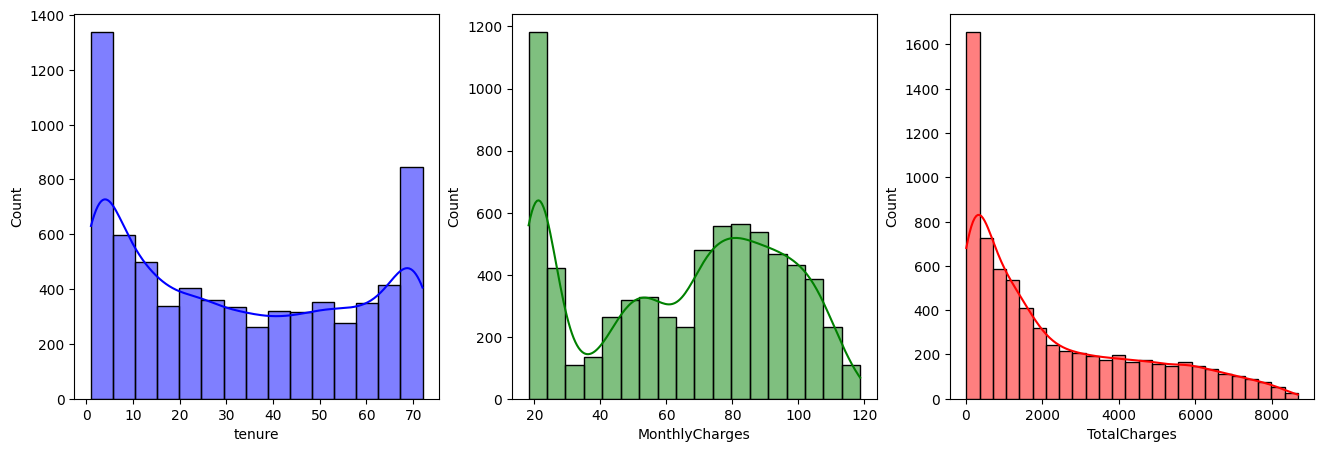

In [19]:
#Outliers checking

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.histplot(churn_df['tenure'],kde=True,color='blue')
plt.subplot(1,3,2)
sns.histplot(churn_df['MonthlyCharges'],kde=True,color='green')
plt.subplot(1,3,3)
sns.histplot(churn_df['TotalCharges'],kde=True,color='red')
plt.show()


In [22]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(churn_df[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = churn_df[i][(churn_df[i] > ul) | (churn_df[i] < ll)]
    print(f'* {i} outlier points***', '\n', outliers, '\n')
detect_outliers(['tenure', 'MonthlyCharges', 'TotalCharges'])

* tenure outlier points*** 
 Series([], Name: tenure, dtype: int64) 

* MonthlyCharges outlier points*** 
 Series([], Name: MonthlyCharges, dtype: float64) 

* TotalCharges outlier points*** 
 Series([], Name: TotalCharges, dtype: float64) 



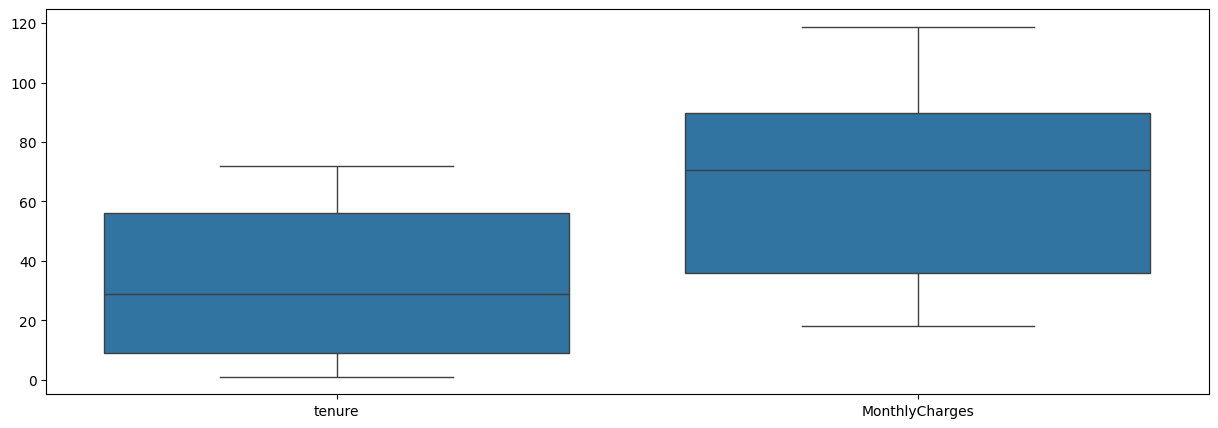

In [25]:
#box plot
plt.figure(figsize=(15, 5))
sns.boxplot(data=churn_df[['tenure',]])
sns.boxplot(data=churn_df[['MonthlyCharges',]])
plt.show()

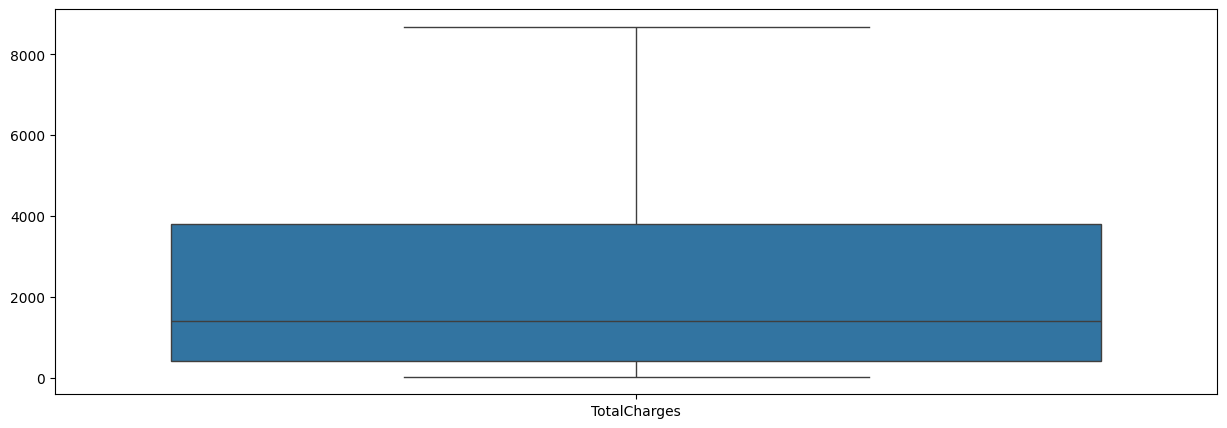

In [27]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=churn_df[['TotalCharges',]])
plt.show()

No Outliers detected in the data

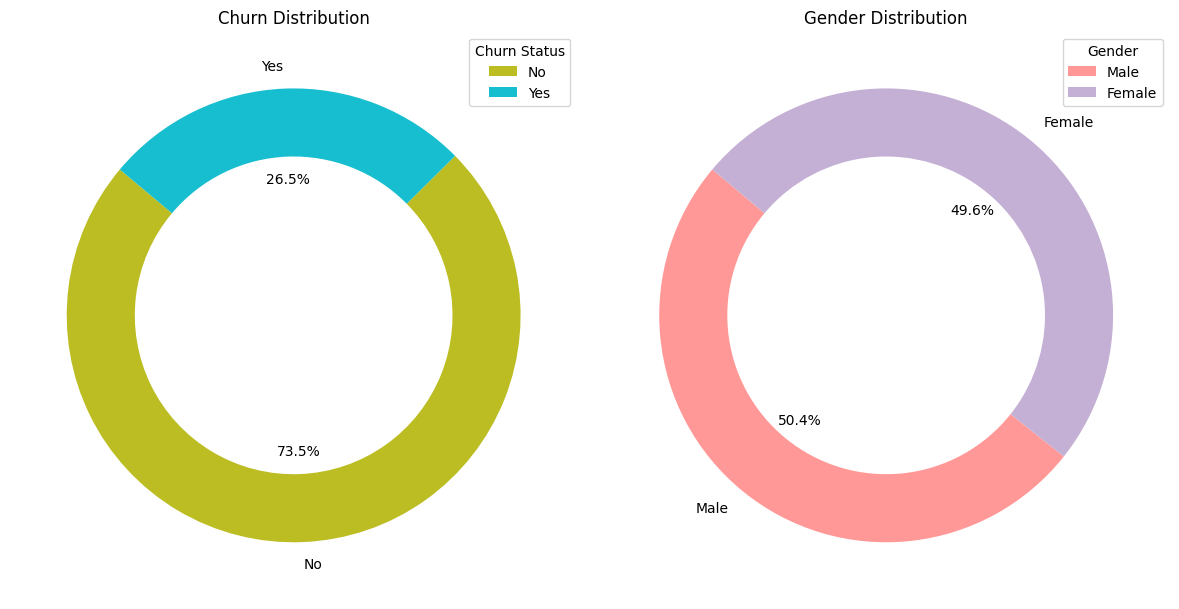

In [28]:
#"Churn and Gender Distribution"


# Calculate the counts for 'Churn' and 'gender'
churn_counts = churn_df['Churn'].value_counts()
gender_counts = churn_df['gender'].value_counts()

# Define colors for the pie charts
colors_churn = ['#bcbd22', '#17becf']
colors_gender = ['#ff9896', '#c5b0d5']

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot the first donut chart for 'Churn'
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_churn, wedgeprops=dict(width=0.3))
plt.title('Churn Distribution')


# Add a legend for Churn
plt.legend(churn_counts.index, loc="best", title="Churn Status")

# Plot the second donut chart for 'Gender'
plt.subplot(1, 2, 2)  # (rows, columns, position)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_gender, wedgeprops=dict(width=0.3))
plt.title('Gender Distribution')


# Add a legend for Gender
plt.legend(gender_counts.index, loc="best", title="Gender")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

26.5 % of customers switched to another firm. Customers are 49.4 % female and 50.5 % male.

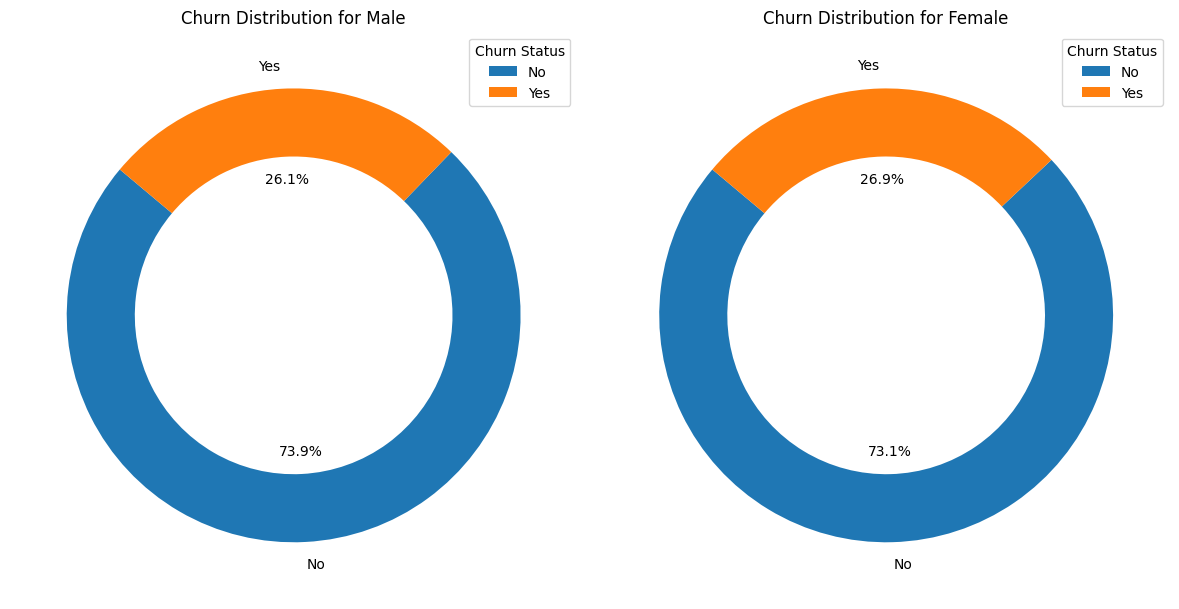

In [29]:
# Create a pivot table to show Churn distribution based on Gender
churn_gender_distribution = churn_df.groupby('gender')['Churn'].value_counts()


# Set up the figure
plt.figure(figsize=(12, 6))

# Plot for Male (Donut Chart)
plt.subplot(1, 2, 1)  # (rows, columns, position)
male_churn_counts = churn_gender_distribution['Male']
plt.pie(male_churn_counts, labels=male_churn_counts.index, autopct='%1.1f%%', startangle=140,  wedgeprops=dict(width=0.3))
plt.title('Churn Distribution for Male')

# Plot for Female (Donut Chart)
plt.subplot(1, 2, 2)  # (rows, columns, position)
female_churn_counts = churn_gender_distribution['Female']
plt.pie(female_churn_counts, labels=female_churn_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Churn Distribution for Female')

# Add legends for both donut charts
plt.subplot(1, 2, 1)
plt.legend(male_churn_counts.index, loc="best", title="Churn Status")
plt.subplot(1, 2, 2)
plt.legend(female_churn_counts.index, loc="best", title="Churn Status")

# Display the plot
plt.tight_layout()
plt.show()

Both genders behaved in similar fashion

/tmp/ipython-input-2153535052.py:9: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.histplot(data=churn_df, x='Churn', hue='Contract', kde=False, discrete=True, multiple="dodge", bins=3, shrink=0.8, palette = palette )


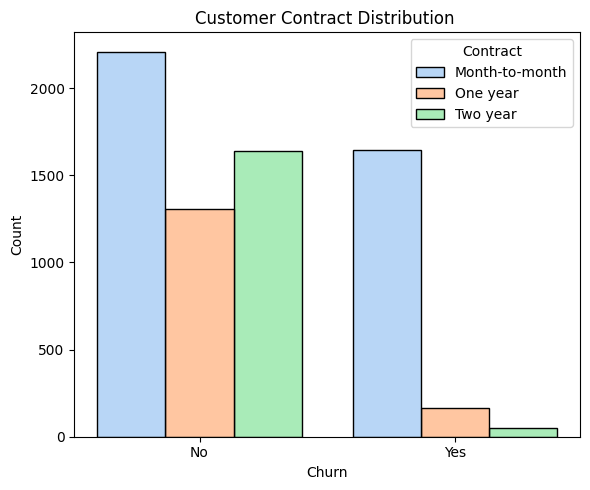

In [30]:
#CUSTOMER CONTRACT DISTRIBUTION

palette = sns.color_palette("pastel")

# Set up the figurepastel
plt.figure(figsize=(6,5))

# Plot the histogram for 'Contract' with respect to 'Churn' using seaborn histplot
sns.histplot(data=churn_df, x='Churn', hue='Contract', kde=False, discrete=True, multiple="dodge", bins=3, shrink=0.8, palette = palette )

# Title and labels
plt.title('Customer Contract Distribution ')
plt.xlabel('Churn')
plt.ylabel('Count')


# Display the plot
plt.tight_layout()
plt.show()

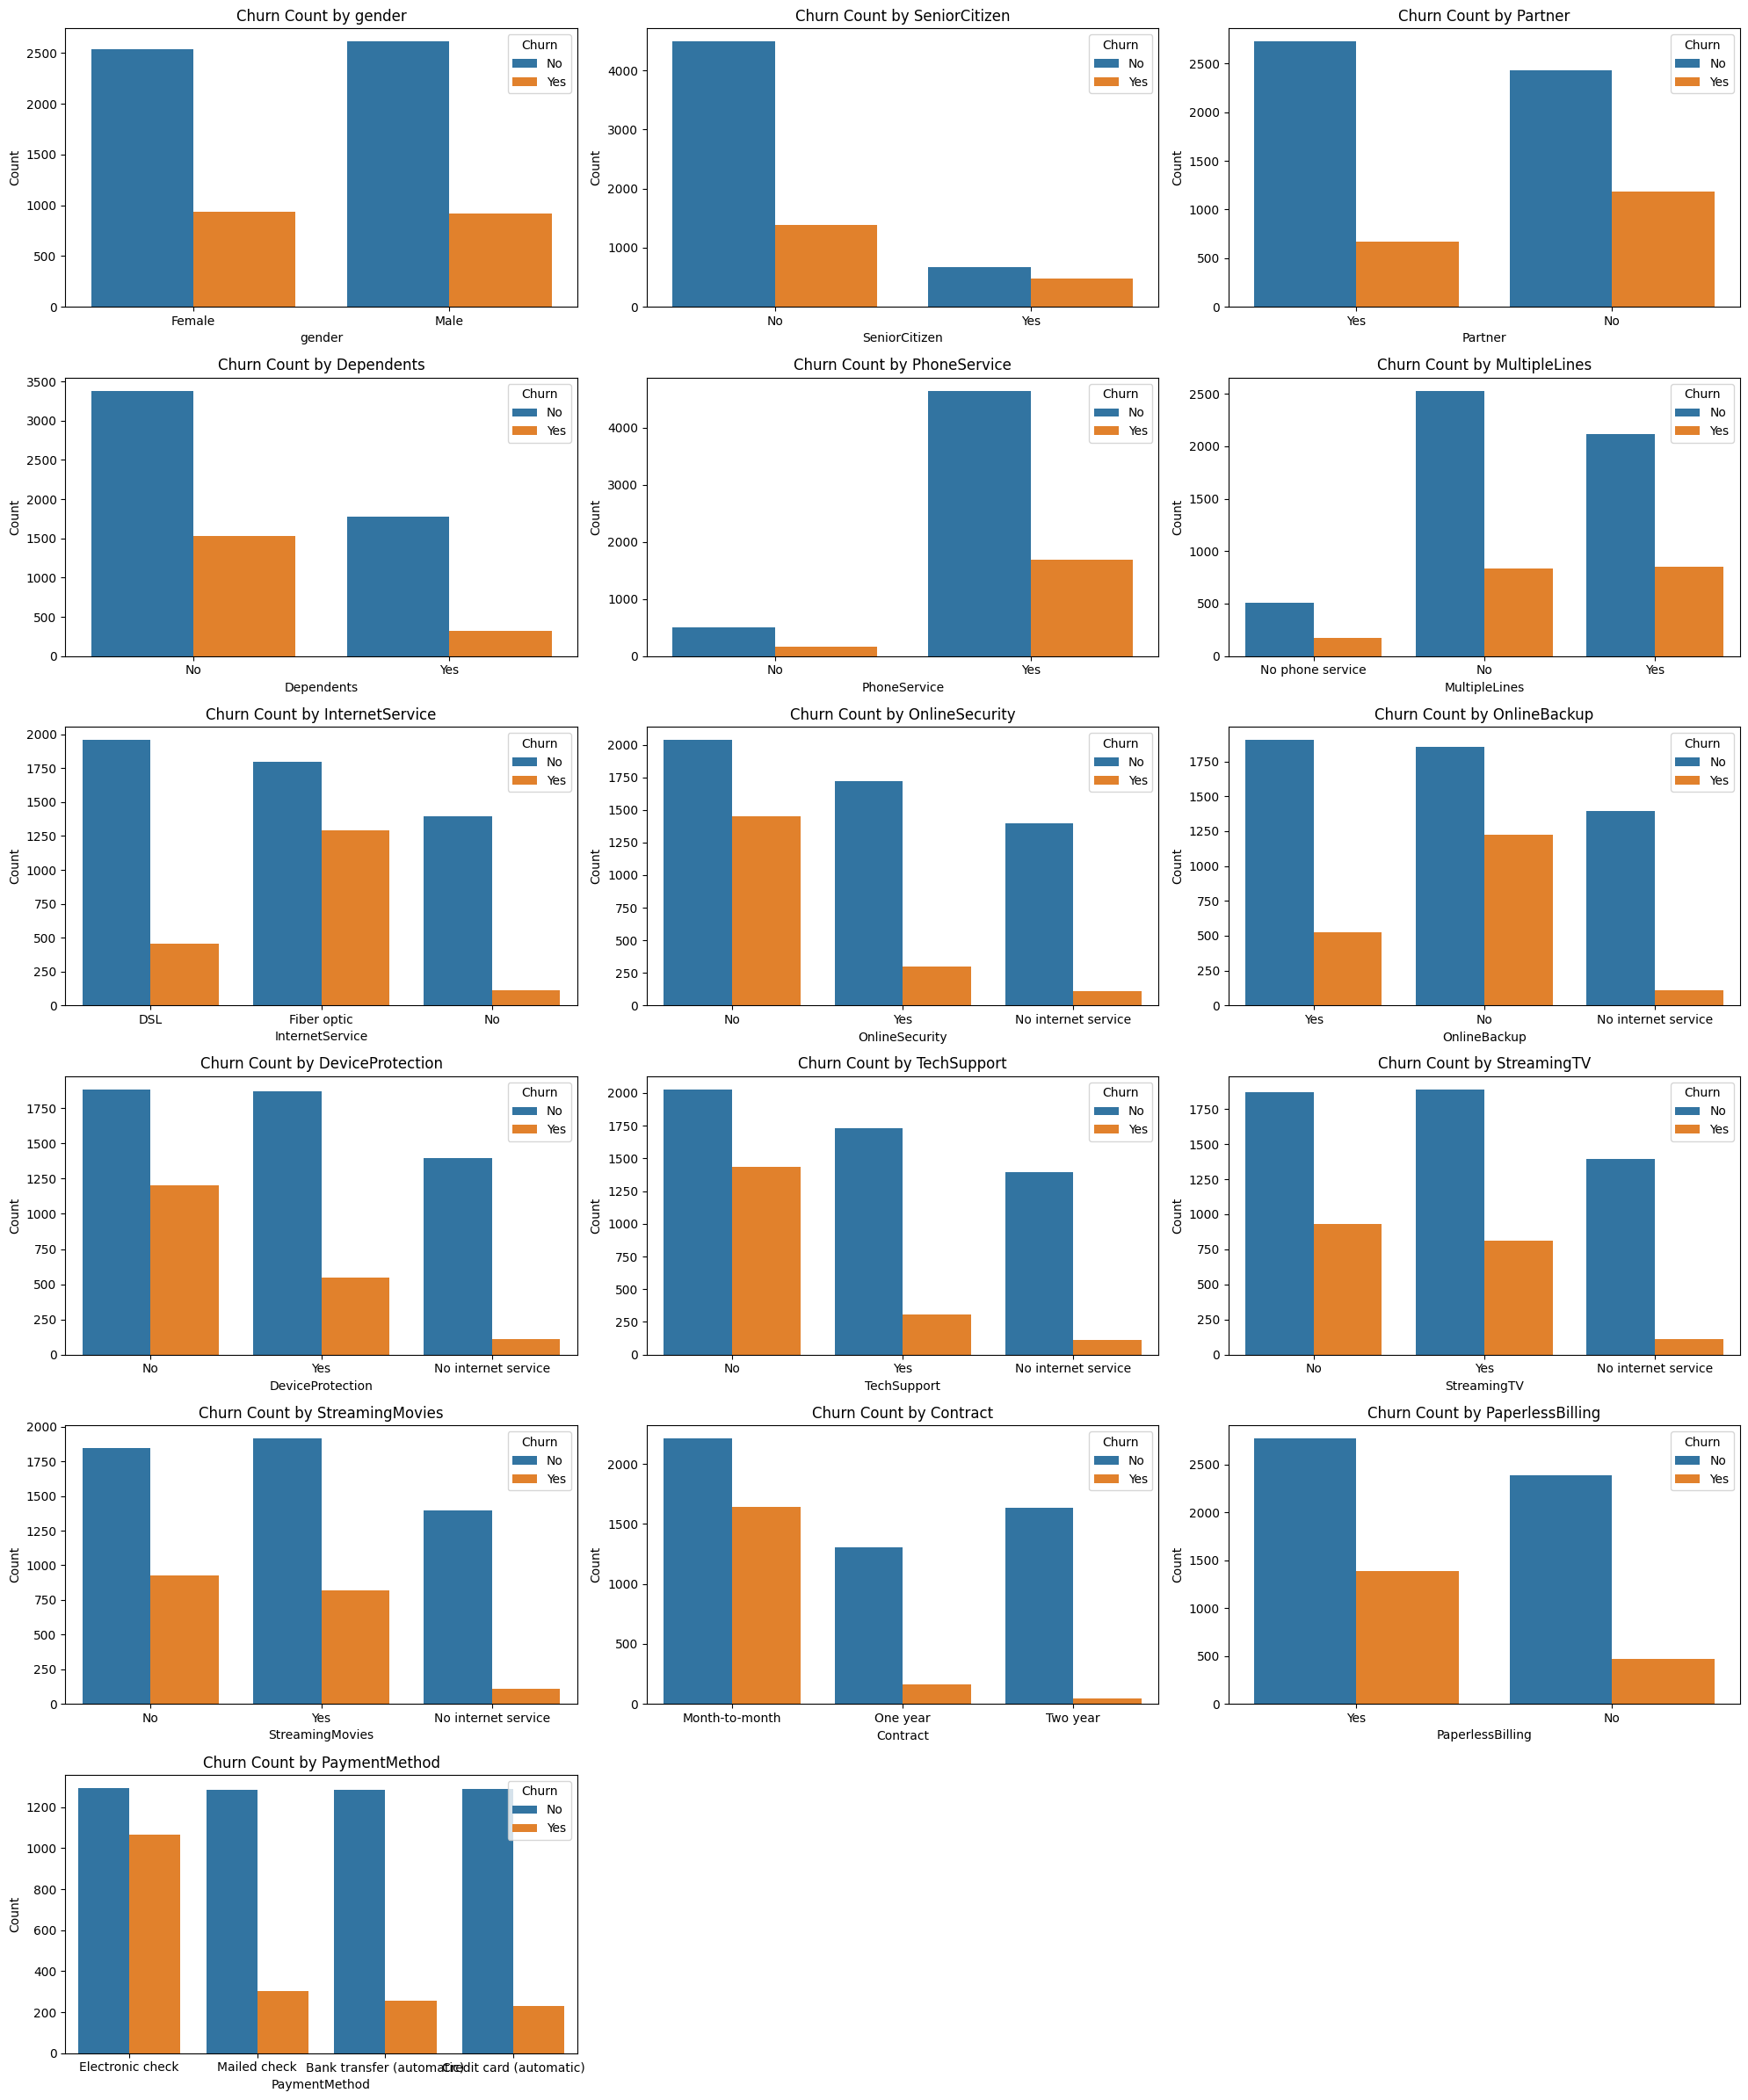

In [31]:
# Define the columns to plot against 'Churn'
columns_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                   'PaymentMethod']

# Define color pairs for the plots
color_pairs = ['tab:blue', 'tab:orange']  # Add more color pairs if needed

# Determine the number of rows and columns for the subplots grid
num_plots = len(columns_to_plot)
num_cols = 3  # Number of columns for the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create count plots for each column against 'Churn'
for idx, column in enumerate(columns_to_plot):
    sns.countplot(ax=axes[idx], x=column, hue='Churn', data=churn_df, palette=color_pairs)
    axes[idx].set_title(f'Churn Count by {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Count')
    axes[idx].legend(title='Churn')

# Remove any unused subplots
for ax in axes[num_plots:]:
    ax.remove()

plt.tight_layout()
plt.show()

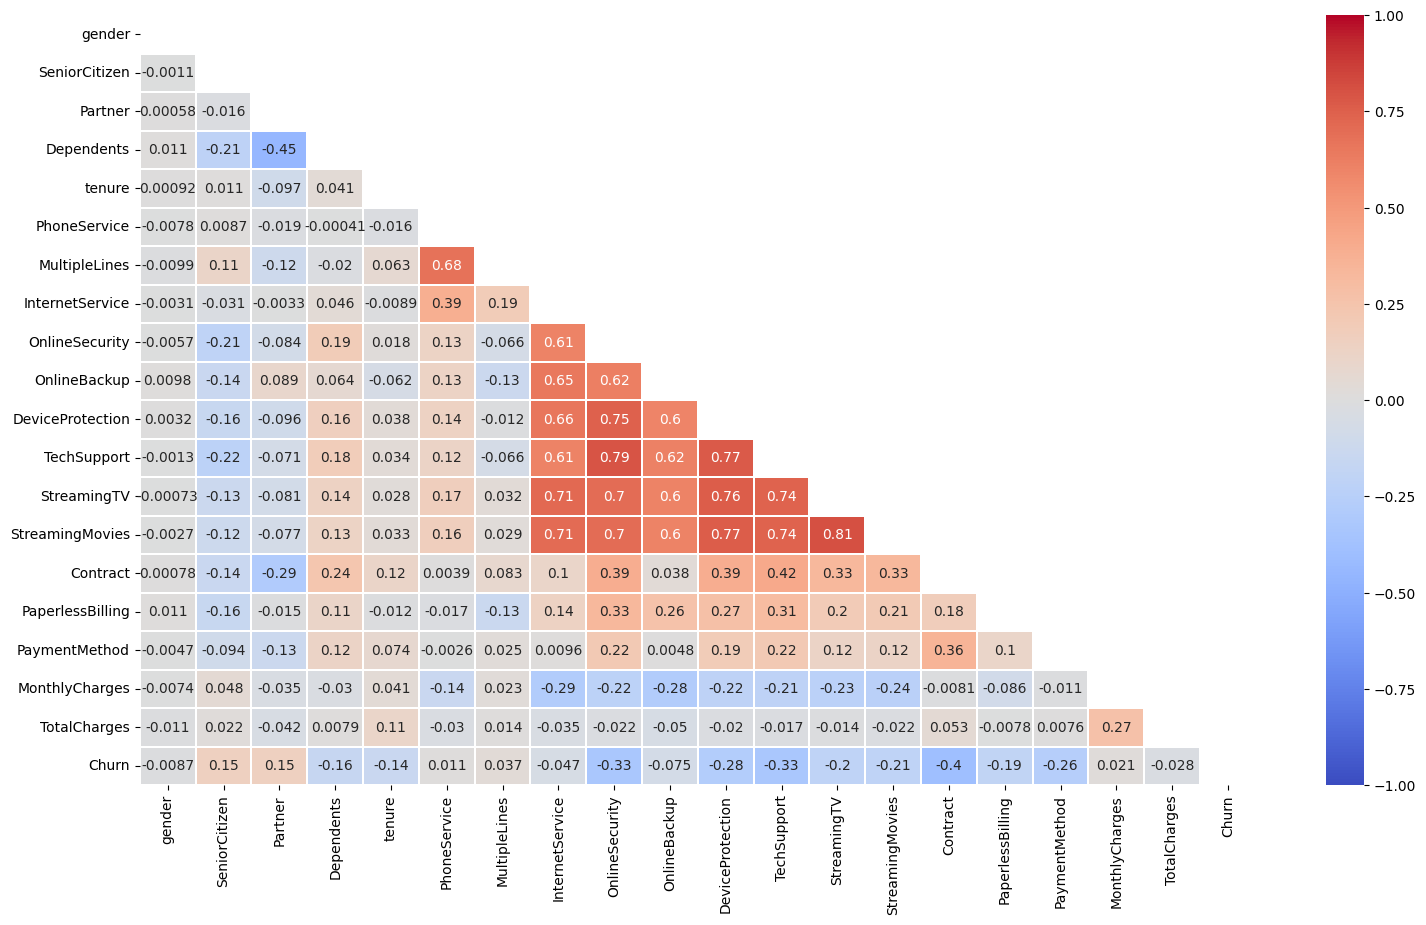

In [33]:
plt.figure(figsize=(18, 10))

corr = churn_df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)


STEP2- DATA PREPROCESSING AND ML MODEL

In [34]:
# Data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix

In [35]:
df = churn_df

In [36]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [37]:
#splitting the data
X = df.drop(columns = ['Churn'])
y = df['Churn'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state = 40)


In [38]:
results = {
    'Model': [],
    'Avg Score': [],
}

Logistic Regression
Cross-Validation Scores: [0.79837067 0.79531568 0.79816514 0.80632008 0.80530071]
Avg Cross-Validation Score: 0.8006944574201063
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1548
           1       0.65      0.58      0.62       555

    accuracy                           0.81      2103
   macro avg       0.75      0.74      0.74      2103
weighted avg       0.80      0.81      0.80      2103



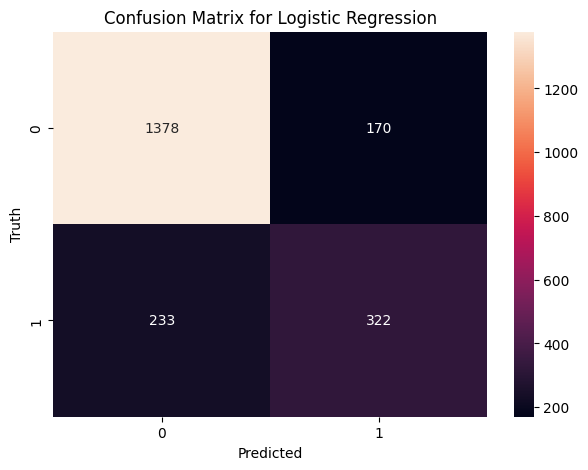

In [39]:
# Logistic Regression
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Fit the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Cross-validation scores
lr_cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_avg_score = np.average(lr_cv_scores)

# Predictions and evaluation
y_pred_lr = lr.predict(X_test)
lr_classification_report = classification_report(y_test, y_pred_lr)
cm = confusion_matrix(y_test, y_pred_lr)

# Print results
print("Logistic Regression")
print("Cross-Validation Scores:", lr_cv_scores)
print("Avg Cross-Validation Score:", lr_avg_score)  # Corrected variable name
print("Classification Report:\n", lr_classification_report)

# Plot confusion matrix
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True, fmt='d')  # 'fmt=d' ensures the annotations are integers
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Logistic Regression')

# Store results
results['Model'].append('Logistic Regression')
results['Avg Score'].append(lr_avg_score)

SVM
Cross-Validation Scores: [0.79633401 0.78615071 0.79001019 0.78593272 0.78797146]
Average Cross-Validation Score: 0.7892798196279204
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1548
           1       0.68      0.51      0.58       555

    accuracy                           0.81      2103
   macro avg       0.76      0.71      0.73      2103
weighted avg       0.80      0.81      0.80      2103



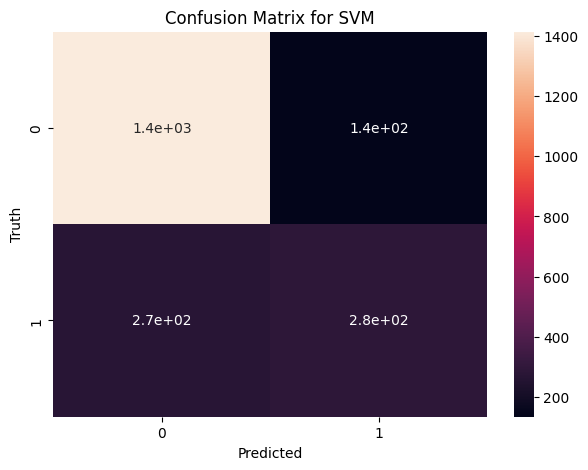

In [40]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)

# Cross-validation scores
svm_cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
svm_avg_score = np.average(svm_cv_scores)

# Predictions and evaluation
y_pred_svm = svm.predict(X_test)
svm_classification_report = classification_report(y_test, y_pred_svm)
cm = confusion_matrix(y_test, y_pred_svm)

# Print results
print("SVM")
print("Cross-Validation Scores:", svm_cv_scores)
print("Average Cross-Validation Score:", svm_avg_score)
print("Classification Report:\n", svm_classification_report)
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for SVM')
plt.show()

# Store results
results['Model'].append('SVM')
results['Avg Score'].append(svm_avg_score)

Decision Tree
Cross-Validation Scores: [0.7413442  0.70570265 0.7166157  0.71763507 0.71559633]
Average Cross-Validation Score: 0.7193787875956826
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1548
           1       0.48      0.52      0.50       555

    accuracy                           0.72      2103
   macro avg       0.65      0.66      0.65      2103
weighted avg       0.73      0.72      0.73      2103



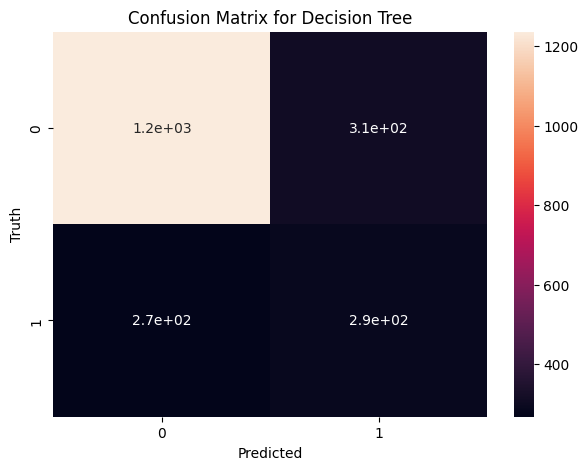

In [41]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Cross-validation scores
dt_cv_scores = cross_val_score(dt, X_train, y_train, cv=5)
dt_avg_score = np.average(dt_cv_scores)

# Predictions and evaluation
y_pred_dt = dt.predict(X_test)
dt_classification_report = classification_report(y_test, y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)

# Print results
print("Decision Tree")
print("Cross-Validation Scores:", dt_cv_scores)
print("Average Cross-Validation Score:", dt_avg_score)
print("Classification Report:\n", dt_classification_report)
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Store results
results['Model'].append('Decision Tree')
results['Avg Score'].append(dt_avg_score)

Random Forest
Cross-Validation Scores: [0.79022403 0.77698574 0.78593272 0.78593272 0.79408767]
Average Cross-Validation Score: 0.7866325770079577
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1548
           1       0.62      0.52      0.56       555

    accuracy                           0.79      2103
   macro avg       0.73      0.70      0.71      2103
weighted avg       0.78      0.79      0.78      2103



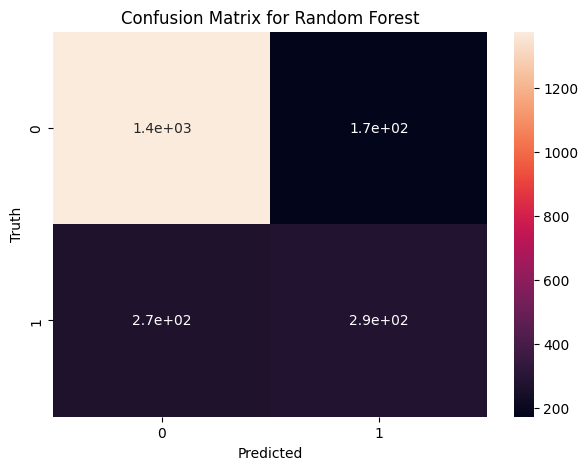

In [42]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Cross-validation scores
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
rf_avg_score = np.average(rf_cv_scores)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
rf_classification_report = classification_report(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)

# Print results
print("Random Forest")
print("Cross-Validation Scores:", rf_cv_scores)
print("Average Cross-Validation Score:", rf_avg_score)
print("Classification Report:\n", rf_classification_report)
plt.figure(figsize=(7, 5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Store results
results['Model'].append('Random Forest')
results['Avg Score'].append(rf_avg_score)


In [43]:
results_df = pd.DataFrame(results)
results_df

,Model,Avg Score
0,Logistic Regression,0.800694
1,SVM,0.789280
2,Decision Tree,0.719379
3,Random Forest,0.786633


Logestic Regression is best model for the giving data.